In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def get_run(df, run_id, io_type='read'):
    io = df['io_type'].values.astype(str)
    ids = df['id'].values
    if io_type == 'read':
        sel = (io == 'read') | (io == '0')
    elif io_type == 'write':
        sel = (io == 'write') | (io == '1')
    sel = sel & (ids == run_id)
    return df[sel]

In [3]:
def example_plot(df, t=r'$\mu$s', adir="plots/"):
    
    plt.figure(figsize=(6, 4))

    if t == 'ms':
        scale = 10**9
    elif t == r'$\mu$s':
        scale = 10**6

    iops = df['iops'].values / 1000
    lat = df['lat'].values / scale
    gen_iops = df['gen_iops'].values / 1000
    gen_lat = df['gen_lat'].values / scale

    #iops, lat = remove_outliers(iops, lat)
    #gen_iops, gen_lat = remove_outliers(gen_iops, gen_lat)

    plt.scatter(iops, lat, color='C0', label='Test sample', alpha=0.4)
    plt.scatter(gen_iops, gen_lat, color='C1', label='Predictions', alpha=0.4)
    #plt.title('CatBoost', size=12)
    plt.xlabel(r"IOPS, $10^3$", size=12)
    plt.ylabel("Latency, "+t, size=12)
    plt.xticks(size=12)
    plt.yticks(size=12)
    legend = plt.legend(fontsize=12)
    for lg in legend.legendHandles:
        lg.set_alpha(1)

    plt.tight_layout()
    #if adir is not None:
        #plt.savefig(adir+io_type+"-"+run_id+".pdf", format='pdf')
    #plt.show()

In [4]:
def space_plot(df_train, df_test):
    plt.figure(figsize=(6, 4))
    plt.scatter(df_train['iops'].values/1000, df_train['lat'].values/10**6, alpha=0.2, color='C2', label='Train sample')
    plt.scatter(df_test['iops'].values/1000, df_test['lat'].values/10**6, alpha=0.2, color='C0', label='Test sample')
    #plt.title('Read, raid=4+2', size=12)
    plt.xlabel(r"IOPS, $10^3$", size=12)
    plt.ylabel(r"Latency, $\mu$s", size=12)
    plt.xticks(size=12)
    plt.yticks(size=12)
    legend = plt.legend(fontsize=12)
    for lg in legend.legendHandles:
        lg.set_alpha(1)
    plt.tight_layout()

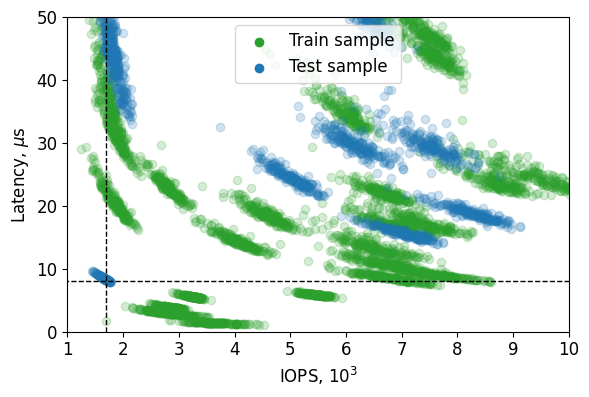

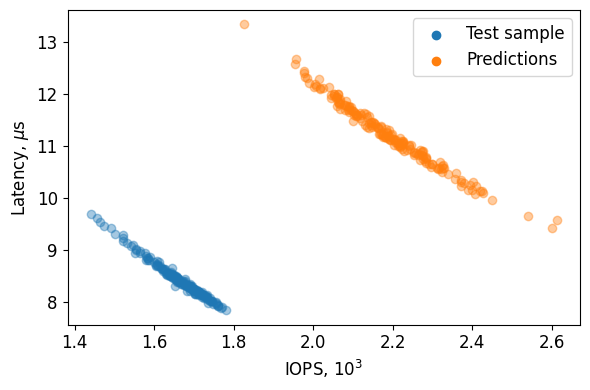

In [5]:
df_train = pd.read_csv("../dataset/pools/train_hdd_sequential.csv")
df_train.head(3)

df_test = pd.read_csv("../dataset/pools/test_hdd_sequential.csv")
df_test.head(3)

df_pred = pd.read_csv("../results/predictions/pools/catboost_density_pred_test_hdd_sequential.csv")
df_pred.head(3)


dfs = []
for adf in [df_train, df_test]:
    sel = (adf['io_type']=='read') * (adf['block_size']==512) * (adf['raid']=='4+2')
    sel = (adf['io_type']=='read') * (adf['raid']=='4+2')
    dfs.append(adf[sel])

space_plot(dfs[0], dfs[1])
plt.xlim(1, 10)
plt.ylim(0, 50)
plt.plot([1.7, 1.7], [0, 50], '--', color='0.', linewidth=1)
plt.plot([0, 10], [8., 8.], '--', color='0.', linewidth=1)
plt.savefig("plots/hdd_seq_anomaly_raid42_read.pdf", format='pdf')
plt.show()


run_id = 'hse-08302022-181607-z62969'
df_pred = get_run(df_pred, run_id=run_id, io_type='read')
example_plot(df_pred)
plt.savefig("plots/hdd_seq_anomaly_"+run_id+".pdf", format='pdf')
plt.show()

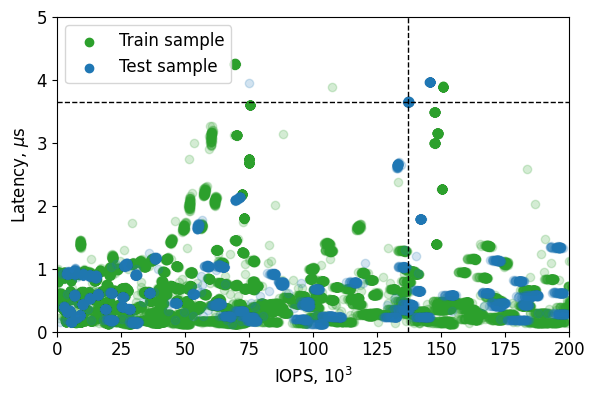

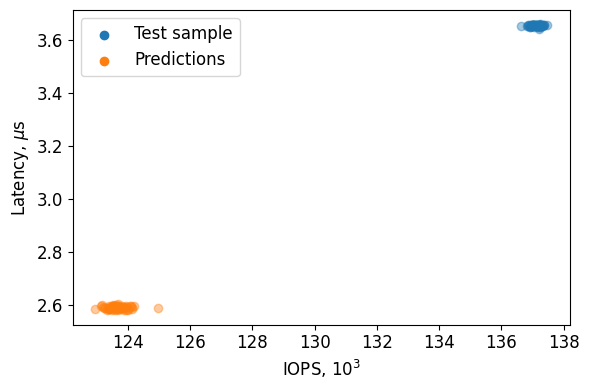

In [6]:
df_train = pd.read_csv("../dataset/cache/train_cache.csv")
df_train.head(3)

df_test = pd.read_csv("../dataset/cache/test_cache.csv")
df_test.head(3)

df_pred = pd.read_csv("../results/predictions/cache/catboost_density_pred_test_cache.csv")
df_pred.head(3)


dfs = []
for adf in [df_train, df_test]:
    #sel = (adf['io_type']=='read') * (adf['block_size']==512) * (adf['raid']=='4+2')
    sel = (adf['io_type']=='read')# * (adf['block_size']==128)
    dfs.append(adf[sel])

space_plot(dfs[0], dfs[1])
plt.xlim(0, 200)
plt.ylim(0, 5)
plt.plot([137, 137], [0, 5], '--', color='0.', linewidth=1)
plt.plot([0, 200], [3.65, 3.65], '--', color='0.', linewidth=1)
plt.savefig("plots/cache_anomaly_read.pdf", format='pdf')
plt.show()

run_id = 'hse-09132022-215639-z27019'
df_pred = get_run(df_pred, run_id=run_id, io_type='read')
example_plot(df_pred)
#plt.xlim(400,)
plt.savefig("plots/cache_anomaly_"+run_id+".pdf", format='pdf')
plt.show()